***Data Analysis***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('/content/xclan_fitness_usage_dataset.csv')
df=pd.DataFrame(data)

In [7]:
df

,user_id,session_date,session_duration_minutes,workout_module_used,calories_burned,completed_goal_checkin,signup_date,age,gender,goal,last_login_date,dropoff_flag
0,U0001,2025-05-13,30,Strength,153.41,No,2025-06-03,43,M,Build Muscle,2025-07-30,No
1,U0001,2025-05-15,66,Cardio,339.89,No,2025-06-03,43,M,Build Muscle,2025-07-30,No
2,U0001,2025-05-19,34,Cardio,214.16,Yes,2025-06-03,43,M,Build Muscle,2025-07-30,No
3,U0001,2025-05-22,88,Cardio,620.48,No,2025-06-03,43,M,Build Muscle,2025-07-30,No
4,U0001,2025-05-23,42,Cardio,322.88,Yes,2025-06-03,43,M,Build Muscle,2025-07-30,No
...,...,...,...,...,...,...,...,...,...,...,...,...
17420,U1000,2025-05-08,50,Yoga,286.81,Yes,2025-07-10,35,M,Stay Active,2025-07-05,Yes
17421,U1000,2025-05-16,37,HIIT,257.35,Yes,2025-07-10,35,M,Stay Active,2025-07-05,Yes
17422,U1000,2025-05-22,44,Cardio,405.46,Yes,2025-07-10,35,M,Stay Active,2025-07-05,Yes
17423,U1000,2025-06-11,33,Strength,181.38,No,2025-07-10,35,M,Stay Active,2025-07-05,Yes


In [9]:
df.shape

(17425, 12)

In [14]:
df.duplicated().any()

np.False_

In [13]:
print(df.nunique())

user_id                      1000
session_date                   92
session_duration_minutes       80
workout_module_used             5
calories_burned             15354
completed_goal_checkin          2
signup_date                    92
age                            37
gender                          2
goal                            3
last_login_date                41
dropoff_flag                    2
last_login_date\t              41
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17425 entries, 0 to 17424
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   17425 non-null  object 
 1   session_date              17425 non-null  object 
 2   session_duration_minutes  17425 non-null  int64  
 3   workout_module_used       17425 non-null  object 
 4   calories_burned           17425 non-null  float64
 5   completed_goal_checkin    17425 non-null  object 
 6   signup_date               17425 non-null  object 
 7   age                       17425 non-null  int64  
 8   gender                    17425 non-null  object 
 9   goal                      17425 non-null  object 
 10  last_login_date           17425 non-null  object 
 11  dropoff_flag              17425 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.6+ MB


In [12]:
df['session_date'] = pd.to_datetime(data['session_date'])
df['signup_date'] = pd.to_datetime(data['signup_date'])
df['last_login_date	'] = pd.to_datetime(data['last_login_date'])

In [16]:
# Select only numeric columns to check if it has negative values or not
numeric_df = df.select_dtypes(include=['number'])

# Check for any negative values in numeric columns
negative_values = print((numeric_df < 0).any().any())

# Calculate IQR for numeric columns
Q1 = numeric_df.quantile(0.25) #25%
Q3 = numeric_df.quantile(0.75) #75%

#the normal data is the difference between Q1 and Q2
IQR = Q3 - Q1

# Identify outliers for numeric columns as outlier is a value higher or lower than 1.5*IQR
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

# Check if there are outliers and print the result
if outliers.any().any():
    print("Outliers detected in the following columns:")
    print(outliers.sum()) #shows each column have how many outlier values
else:
    print("No outliers detected in the dataset.")
# after running the code we found that there is a 40,423 and 103 outliers row in Hours_Studied,Tutoring_Sessions and Tutoring_Sessions respectively


False
No outliers detected in the dataset.


In [3]:

# استخراج الساعة واليوم من الطابع الزمني
#data['hour'] = data['timestamp'].dt.hour
#data['day_of_week'] = data['timestamp'].dt.day_name()

# 1. أوقات الذروة - عدد الجلسات لكل ساعة
hourly_usage = data.groupby('hour').size()

plt.figure(figsize=(10,6))
sns.barplot(x=hourly_usage.index, y=hourly_usage.values, palette='viridis')
plt.title('Peak Activity Times (by Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sessions')
plt.show()

# 2. الميزات الأكثر استخداماً
feature_usage = data['feature_used'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=feature_usage.index, y=feature_usage.values, palette='magma')
plt.title('Most Popular Features')
plt.xlabel('Feature')
plt.ylabel('Usage Count')
plt.xticks(rotation=45)
plt.show()

# 3. نقاط ترك المستخدمين (Drop-off points)
# مثال بسيط: حساب عدد المستخدمين الذين لم يعودوا بعد جلسة معينة
# نفترض عندنا عمود session_id و user_id و timestamps

# حساب عدد الجلسات لكل مستخدم
session_counts = data.groupby('user_id')['session_id'].nunique()

print("Distribution of session counts per user:")
print(session_counts.value_counts().sort_index())

# ممكن نعمل تحليل أعمق حسب تفاصيل البيانات



,user_id,session_date,session_duration_minutes,workout_module_used,calories_burned,completed_goal_checkin,signup_date,age,gender,goal,last_login_date,dropoff_flag
0,U0001,2025-05-13,30,Strength,153.41,No,2025-06-03,43,M,Build Muscle,2025-07-30,No
1,U0001,2025-05-15,66,Cardio,339.89,No,2025-06-03,43,M,Build Muscle,2025-07-30,No
2,U0001,2025-05-19,34,Cardio,214.16,Yes,2025-06-03,43,M,Build Muscle,2025-07-30,No
3,U0001,2025-05-22,88,Cardio,620.48,No,2025-06-03,43,M,Build Muscle,2025-07-30,No
4,U0001,2025-05-23,42,Cardio,322.88,Yes,2025-06-03,43,M,Build Muscle,2025-07-30,No
...,...,...,...,...,...,...,...,...,...,...,...,...
17420,U1000,2025-05-08,50,Yoga,286.81,Yes,2025-07-10,35,M,Stay Active,2025-07-05,Yes
17421,U1000,2025-05-16,37,HIIT,257.35,Yes,2025-07-10,35,M,Stay Active,2025-07-05,Yes
17422,U1000,2025-05-22,44,Cardio,405.46,Yes,2025-07-10,35,M,Stay Active,2025-07-05,Yes
17423,U1000,2025-06-11,33,Strength,181.38,No,2025-07-10,35,M,Stay Active,2025-07-05,Yes


In [18]:
df['day_of_week'] = df['session_date'].dt.day_name()

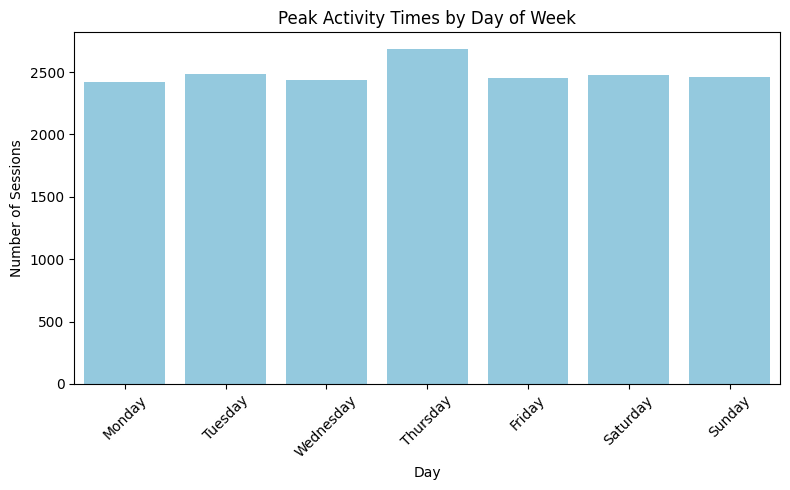

In [25]:
session_counts_by_day = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(8, 5))
sns.barplot(x=session_counts_by_day.index, y=session_counts_by_day.values, color='skyblue')
plt.title('Peak Activity Times by Day of Week')
plt.ylabel('Number of Sessions')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

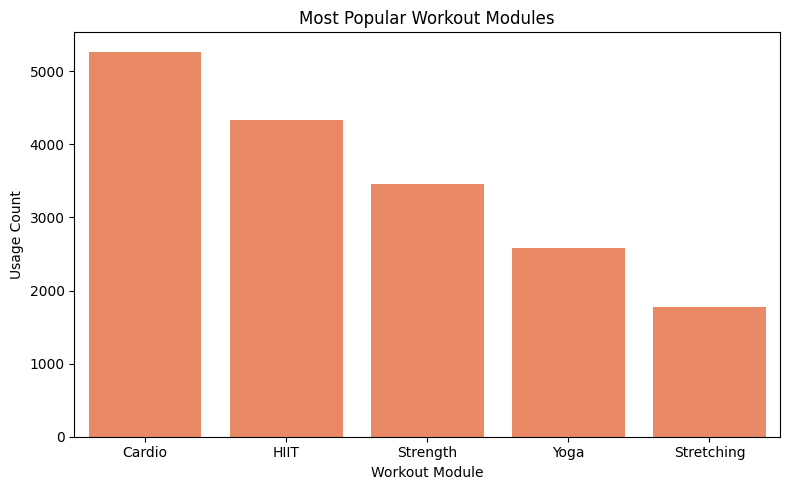

In [27]:
# 🎯 2. أكثر التمارين استخدامًا
# -----------------------------
workout_usage = df['workout_module_used'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=workout_usage.index, y=workout_usage.values, color='coral')
plt.title('Most Popular Workout Modules')
plt.ylabel('Usage Count')
plt.xlabel('Workout Module')
plt.tight_layout()
plt.show()

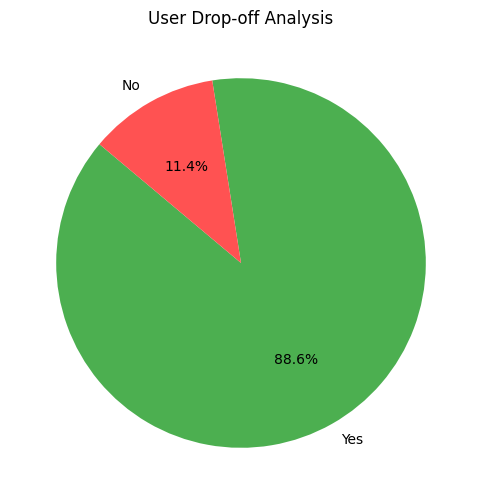

In [29]:
# 3.drop-off
# -----------------------------
dropoff_stats = df.groupby('user_id')['dropoff_flag'].last().value_counts()

labels = ['Yes','No']
plt.figure(figsize=(6, 6))
plt.pie(dropoff_stats, labels=labels, autopct='%1.1f%%', colors=['#4CAF50', '#FF5252'], startangle=140)
plt.title('User Drop-off Analysis')
plt.show()

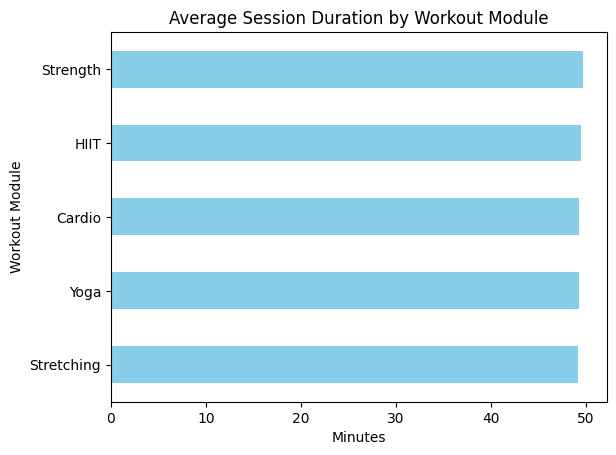

In [32]:
avg_duration_per_module = df.groupby('workout_module_used')['session_duration_minutes'].mean().sort_values()

avg_duration_per_module.plot(kind='barh', color='skyblue')
plt.title('Average Session Duration by Workout Module')
plt.xlabel('Minutes')
plt.ylabel('Workout Module')
plt.show()


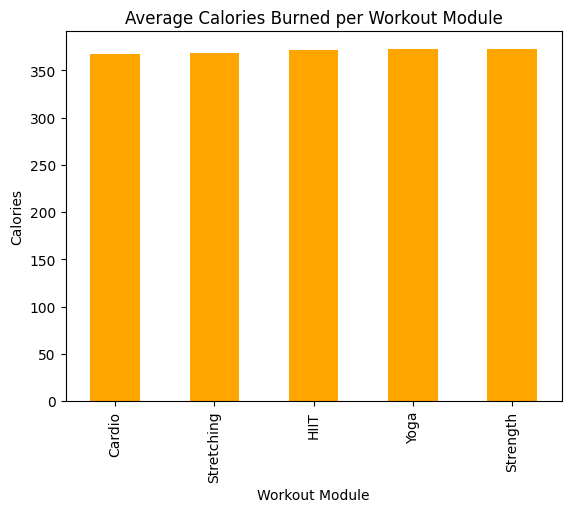

In [33]:
avg_calories = df.groupby('workout_module_used')['calories_burned'].mean().sort_values()

avg_calories.plot(kind='bar', color='orange')
plt.title('Average Calories Burned per Workout Module')
plt.ylabel('Calories')
plt.xlabel('Workout Module')
plt.show()


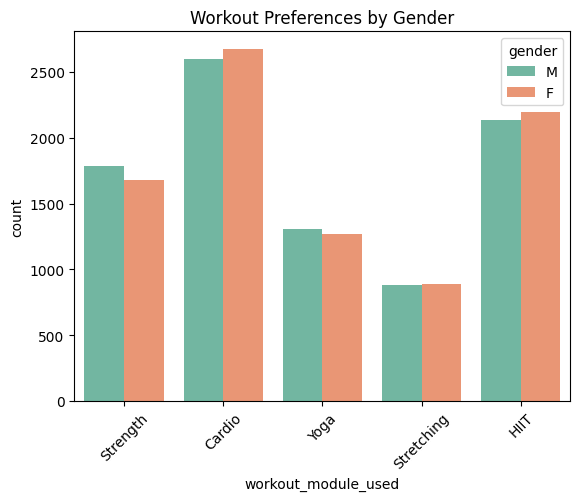

In [35]:
sns.countplot(data=df, x='workout_module_used', hue='gender', palette='Set2')
plt.title('Workout Preferences by Gender')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3558570634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age_group', palette='coolwarm')


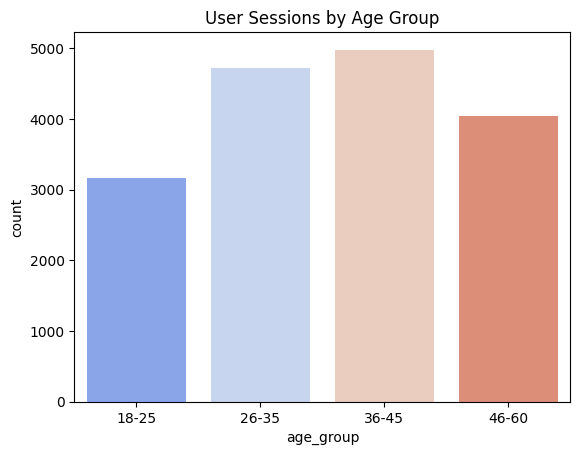

In [37]:
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 60], labels=['18-25', '26-35', '36-45', '46-60'])

sns.countplot(data=df, x='age_group', palette='coolwarm')
plt.title('User Sessions by Age Group')
plt.show()


In [40]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[17, 25, 35, 45, 60],
    labels=['18-25', '26-35', '36-45', '46-60']
)

# نحسب عدد كل نوع تمرين داخل كل فئة عمرية
age_workout_counts = df.groupby(['age_group', 'workout_module_used']).size().reset_index(name='count')

# نجيب أكثر تمرين لكل فئة عمرية
top_workout_by_age = age_workout_counts.sort_values('count', ascending=False).drop_duplicates('age_group')

print(top_workout_by_age)


   age_group workout_module_used  count
10     36-45              Cardio   1502
5      26-35              Cardio   1412
15     46-60              Cardio   1204
0      18-25              Cardio   1152


/tmp/ipython-input-3408844691.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_workout_counts = df.groupby(['age_group', 'workout_module_used']).size().reset_index(name='count')


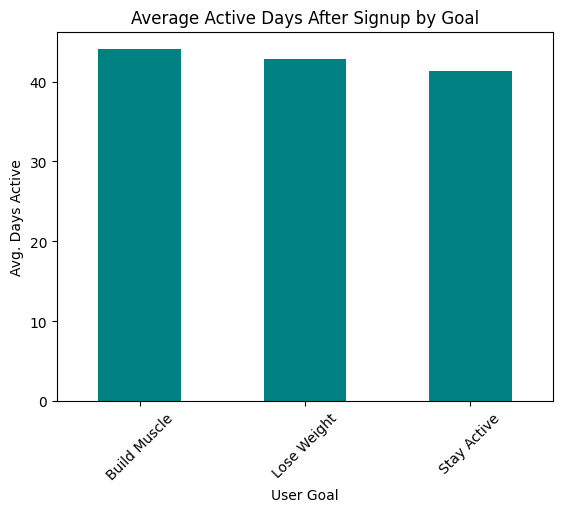

In [45]:
# متوسط فترة النشاط حسب الهدف
avg_days_by_goal = df.groupby('goal')['days_active_since_signup'].mean().sort_values(ascending=False)

avg_days_by_goal.plot(kind='bar', color='teal')
plt.title('Average Active Days After Signup by Goal')
plt.xlabel('User Goal')
plt.ylabel('Avg. Days Active')
plt.xticks(rotation=45)
plt.show()


***Machine Learning***


Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       182
           1       0.29      0.22      0.25        18

    accuracy                           0.88       200
   macro avg       0.61      0.58      0.59       200
weighted avg       0.87      0.88      0.87       200



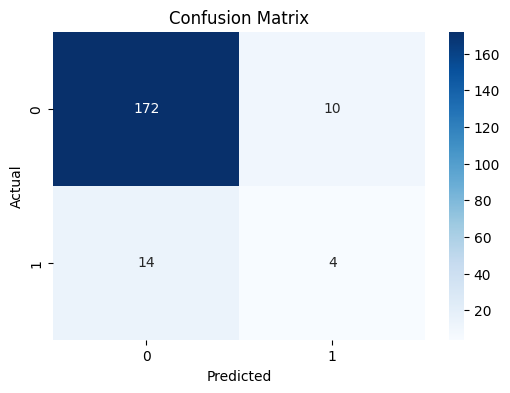

In [49]:
#حساب تكرار الجلسات لكل مستخدم (عدد الجلسات)
session_counts = df.groupby('user_id')['session_date'].count().reset_index()
session_counts.columns = ['user_id', 'session_frequency']

#حساب الوقت الكلي لكل مستخدم
total_time = df.groupby('user_id')['session_duration_minutes'].sum().reset_index()
total_time.columns = ['user_id', 'total_time_spent']

#(progress)
completed_sessions = df.groupby('user_id')['completed_goal_checkin'].apply(lambda x: (x == 'Yes').mean()).reset_index()
completed_sessions.columns = ['user_id', 'completion_rate']

# (dropoff_flag)
dropoff_flag = df.groupby('user_id')['dropoff_flag'].last().reset_index()

# دمج كل الميزات في جدول واحد
features = session_counts.merge(total_time, on='user_id')\
                         .merge(completed_sessions, on='user_id')\
                         .merge(dropoff_flag, on='user_id')

# تحويل المتغير الهدف (target) لقيم رقمية
features['dropoff_flag'] = features['dropoff_flag'].map({'Yes': 1, 'No': 0})


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

X = features[['session_frequency', 'total_time_spent', 'completion_rate']]
y = features['dropoff_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [47]:
importances = model.feature_importances_
features_names = X.columns
for name, importance in zip(features_names, importances):
    print(f"{name}: {importance:.3f}")


session_frequency: 0.184
total_time_spent: 0.608
completion_rate: 0.208


***AI***

In [51]:
user_profile = {
    'goal': 'Build Muscle',
    'past_workouts': ['Cardio', 'Yoga'],
    'injuries': ['knee']  # مثال إصابة في الركبة
}

# قائمة خطط التمرين (كل خطة مع خصائصها)
workout_plans = [
    {'plan_id': 1, 'name': 'Muscle Builder Basic', 'focus': 'Build Muscle', 'exercises': ['Strength', 'HIIT'], 'avoid_for_injuries': []},
    {'plan_id': 2, 'name': 'Low Impact Cardio', 'focus': 'Stay Active', 'exercises': ['Cardio', 'Yoga'], 'avoid_for_injuries': ['knee']},
    {'plan_id': 3, 'name': 'Advanced Strength', 'focus': 'Build Muscle', 'exercises': ['Strength'], 'avoid_for_injuries': []},
    {'plan_id': 4, 'name': 'Flexibility Focus', 'focus': 'Stay Active', 'exercises': ['Yoga'], 'avoid_for_injuries': []}
]

def recommend_workout_plans(user, plans):
    recommendations = []
    for plan in plans:
        # 1. تحقق من الهدف
        if plan['focus'] != user['goal']:
            continue

        # 2. تحقق من الإصابات
        if any(injury in plan['avoid_for_injuries'] for injury in user['injuries']):
            continue

        # 3. تحقق من التمارين السابقة لتجنب التكرار الممل
        if any(ex in user['past_workouts'] for ex in plan['exercises']):
            continue

        recommendations.append(plan)

    # لو مفيش خطة بعد الفلترة، نرجع خطط بالهدف فقط (حتى لو فيها تمارين مكررة)
    if not recommendations:
        recommendations = [plan for plan in plans if plan['focus'] == user['goal']]

    return recommendations

recommended_plans = recommend_workout_plans(user_profile, workout_plans)

for plan in recommended_plans:
    print(f"Recommended Plan: {plan['name']}")


Recommended Plan: Muscle Builder Basic
Recommended Plan: Advanced Strength
